<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/tokyo_covid19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pytz import timezone
import numpy as np

%matplotlib inline

### Tokyo COVID19 Data
https://github.com/tokyo-metropolitan-gov/covid19

In [2]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
# json文字列をdictへ
j_res = json.loads(response.text)
j_res.keys()

dict_keys(['contacts', 'querents', 'patients', 'patients_summary', 'discharges_summary', 'inspections_summary', 'inspection_persons', 'inspection_status_summary', 'lastUpdate', 'main_summary'])

In [5]:
# データフレームにセット
df = pd.DataFrame(j_res)

In [6]:
# `patients_summary`
df.patients_summary.data[-10:]

[{'小計': 238, '日付': '2020-07-22T08:00:00.000Z'},
 {'小計': 366, '日付': '2020-07-23T08:00:00.000Z'},
 {'小計': 260, '日付': '2020-07-24T08:00:00.000Z'},
 {'小計': 295, '日付': '2020-07-25T08:00:00.000Z'},
 {'小計': 239, '日付': '2020-07-26T08:00:00.000Z'},
 {'小計': 131, '日付': '2020-07-27T08:00:00.000Z'},
 {'小計': 266, '日付': '2020-07-28T08:00:00.000Z'},
 {'小計': 250, '日付': '2020-07-29T08:00:00.000Z'},
 {'小計': 367, '日付': '2020-07-30T08:00:00.000Z'},
 {'小計': 463, '日付': '2020-07-31T08:00:00.000Z'}]

In [7]:
# `patients_summary` の `data` を抽出しデータフレームにセット
sub_df = pd.DataFrame(df.patients_summary.data)
sub_df.tail()

,日付,小計
185,2020-07-27T08:00:00.000Z,131
186,2020-07-28T08:00:00.000Z,266
187,2020-07-29T08:00:00.000Z,250
188,2020-07-30T08:00:00.000Z,367
189,2020-07-31T08:00:00.000Z,463


In [8]:
# 日付型の列を追加
#sub_df['datetime.date'] = [datetime.datetime.fromisoformat(str.replace('Z', '+00:00')).astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
# for ~Python3.6(Google Colab)
sub_df['datetime.date'] = [datetime.datetime.strptime(str.split('.')[0].replace('-', '').replace(':', ''), '%Y%m%dT%H%M%S').astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
sub_df.tail()

,日付,小計,datetime.date
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00
186,2020-07-28T08:00:00.000Z,266,2020-07-28 17:00:00+09:00
187,2020-07-29T08:00:00.000Z,250,2020-07-29 17:00:00+09:00
188,2020-07-30T08:00:00.000Z,367,2020-07-30 17:00:00+09:00
189,2020-07-31T08:00:00.000Z,463,2020-07-31 17:00:00+09:00


In [9]:
# 日付が年の何週目かを列にセット `'{yy}w{week nnum}`
sub_df['week_num'] = [f'\'{d.strftime("%y")}w{d.strftime("%V")}' for d in sub_df['datetime.date']]
sub_df.tail()

,日付,小計,datetime.date,week_num
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00,'20w31
186,2020-07-28T08:00:00.000Z,266,2020-07-28 17:00:00+09:00,'20w31
187,2020-07-29T08:00:00.000Z,250,2020-07-29 17:00:00+09:00,'20w31
188,2020-07-30T08:00:00.000Z,367,2020-07-30 17:00:00+09:00,'20w31
189,2020-07-31T08:00:00.000Z,463,2020-07-31 17:00:00+09:00,'20w31


In [10]:
# 曜日の列をセット
sub_df['week_day'] = [d.strftime('%a') for d in sub_df['datetime.date']]
sub_df.tail(15)

,日付,小計,datetime.date,week_num,week_day
175,2020-07-17T08:00:00.000Z,293,2020-07-17 17:00:00+09:00,'20w29,Fri
176,2020-07-18T08:00:00.000Z,290,2020-07-18 17:00:00+09:00,'20w29,Sat
177,2020-07-19T08:00:00.000Z,188,2020-07-19 17:00:00+09:00,'20w29,Sun
178,2020-07-20T08:00:00.000Z,168,2020-07-20 17:00:00+09:00,'20w30,Mon
179,2020-07-21T08:00:00.000Z,237,2020-07-21 17:00:00+09:00,'20w30,Tue
180,2020-07-22T08:00:00.000Z,238,2020-07-22 17:00:00+09:00,'20w30,Wed
181,2020-07-23T08:00:00.000Z,366,2020-07-23 17:00:00+09:00,'20w30,Thu
182,2020-07-24T08:00:00.000Z,260,2020-07-24 17:00:00+09:00,'20w30,Fri
183,2020-07-25T08:00:00.000Z,295,2020-07-25 17:00:00+09:00,'20w30,Sat
184,2020-07-26T08:00:00.000Z,239,2020-07-26 17:00:00+09:00,'20w30,Sun


In [11]:
# 週毎に集計
groupby_week_num = sub_df.groupby('week_num')
groupby_week_num

In [12]:
# 集計結果から平均と合計を取得しデータフレームにセット
week_num_df = pd.DataFrame({
    'week_num': sub_df['week_num'].unique(),
    'mean': [m for m in groupby_week_num.agg({'小計': 'mean'})['小計']], 
    'sum': [s for s in groupby_week_num.agg({'小計': 'sum'})['小計']]
})
week_num_df.tail()

,week_num,mean,sum
23,'20w27,93.142857,652
24,'20w28,166.000000,1162
25,'20w29,212.000000,1484
26,'20w30,257.571429,1803
27,'20w31,295.400000,1477


### グラフ出力

In [13]:
### 日毎の数
x = sub_df['datetime.date']
y = sub_df['小計']

In [14]:
### 週毎の数
x2 = week_num_df['week_num']
y2_1 = week_num_df['mean']
y2_2 = week_num_df['sum']

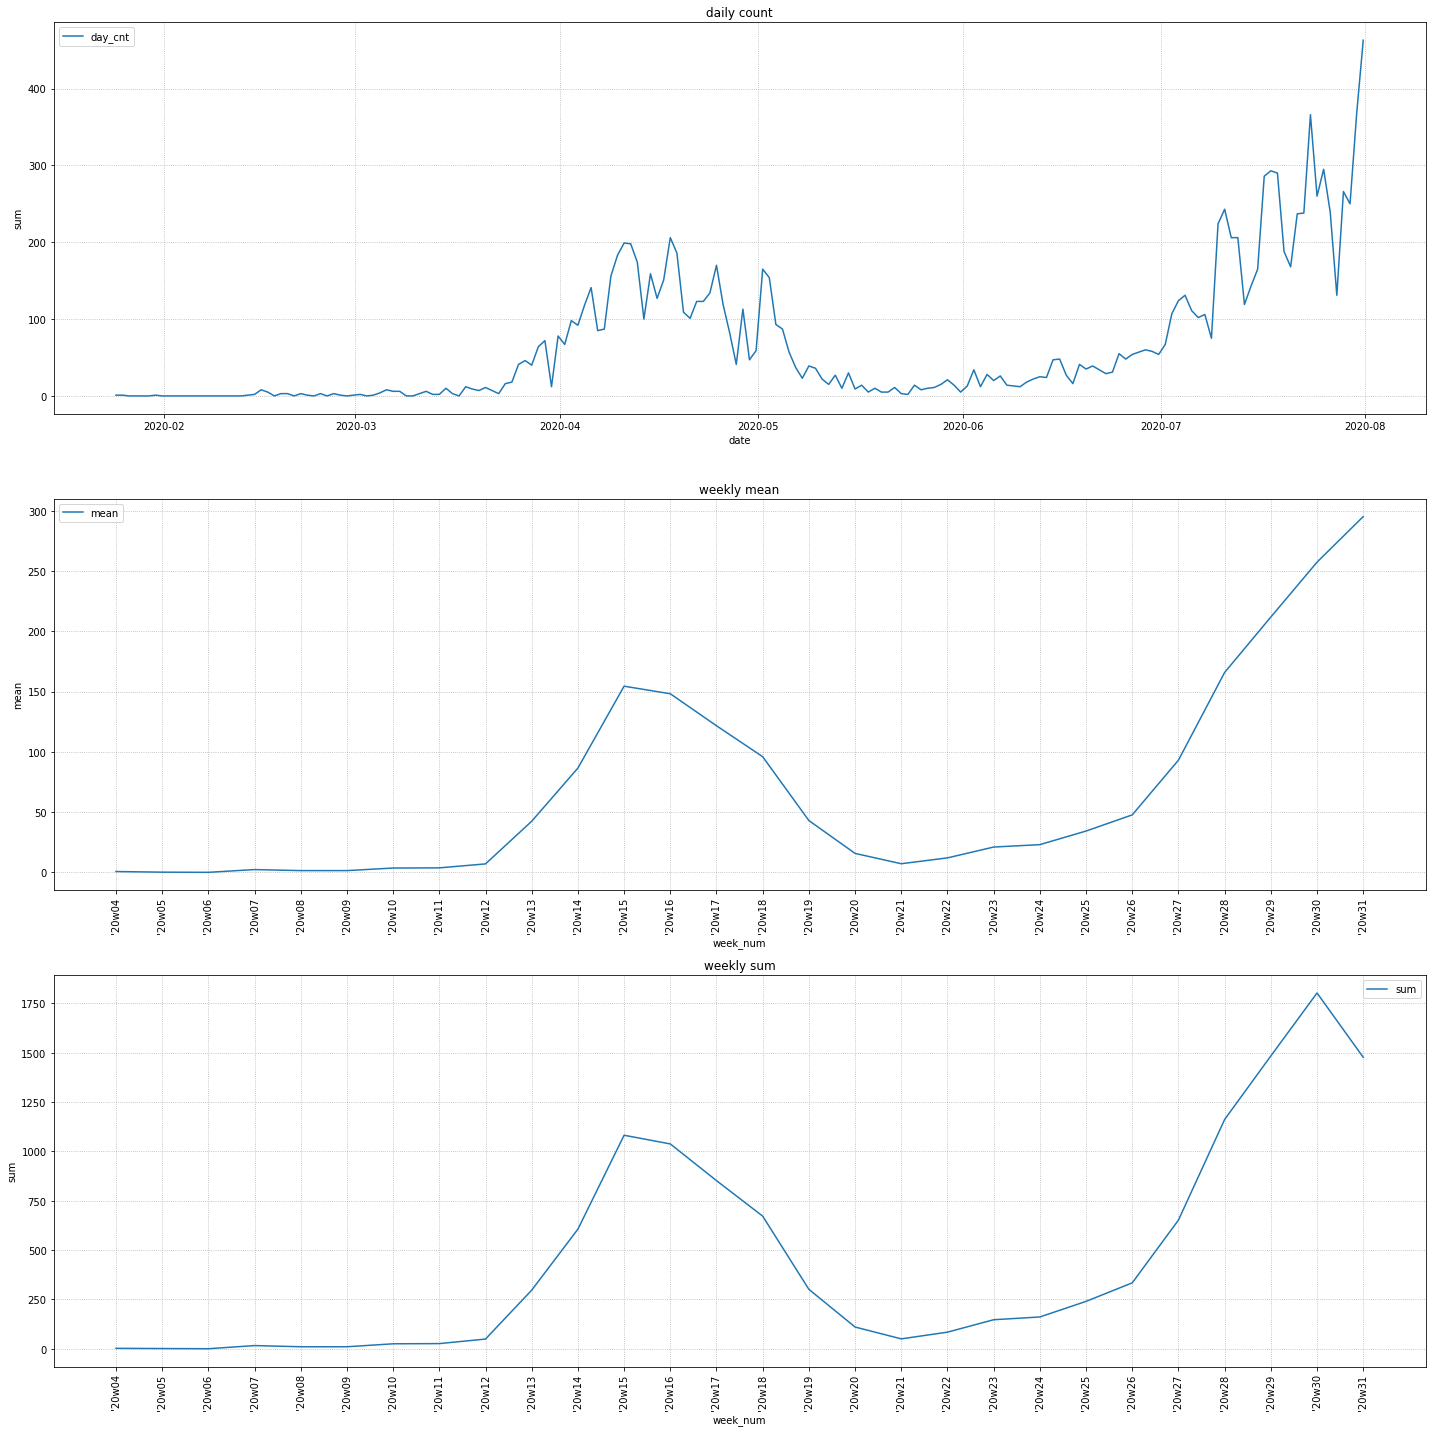

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

### 日毎の数
ax[0].set_title('daily count')
ax[0].set_xlabel('date')
ax[0].set_ylabel('sum')
ax[0].plot(x, y, label='day_cnt')
ax[0].grid(linestyle=':')
ax[0].legend()

### 週毎の平均
ax[1].set_title('weekly mean')
ax[1].set_xticklabels(labels=x2, rotation=90)
ax[1].set_xlabel('week_num')
ax[1].set_ylabel('mean')
ax[1].plot(x2, y2_1, label='mean')
ax[1].grid(linestyle=':')
ax[1].legend()

### 週毎の合計
ax[2].set_title('weekly sum')
ax[2].set_xticklabels(labels=x2, rotation=90)
ax[2].set_xlabel('week_num')
ax[2].set_ylabel('sum')
ax[2].plot(x2, y2_2, label='sum')
ax[2].grid(linestyle=':')
ax[2].legend()

plt.tight_layout()

---

In [16]:
em_start = datetime.datetime(2020, 4, 7)
em_end = datetime.datetime(2020, 5, 25)
em_days = []
for i in range((em_end - em_start).days + 1):
  em_days.append(em_start + datetime.timedelta(i))

In [17]:
year = []
month = []
day = []
for d in sub_df['datetime.date']:
  year.append(int(d.strftime('%Y')))
  month.append(int(d.strftime('%m')))
  day.append(int(d.strftime('%d')))

In [18]:
ds_df = sub_df

# 年
ds_df['year'] = year
# 月
ds_df['month'] = month
# 日
ds_df['day'] = day
# 曜日をダミー変数化
ds_df = pd.concat([ds_df, pd.get_dummies(ds_df['week_day'])], axis=1)
# 経過日数
ds_df['passed'] = [(d - ds_df['datetime.date'][0]).days for d in ds_df['datetime.date']]
# 緊急事態宣言
ds_df['emergency'] = [int(datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') in em_days) for d in ds_df['datetime.date']]
# 緊急事態宣言経過日数
ds_df['em_passed'] = [((datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') - em_start).days if em_start < datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') else 0) for d in ds_df['datetime.date']]
# 検査数

ds_df

,日付,小計,datetime.date,week_num,week_day,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed
0,2020-01-24T08:00:00.000Z,1,2020-01-24 17:00:00+09:00,'20w04,Fri,2020,1,24,1,0,0,0,0,0,0,0,0,0
1,2020-01-25T08:00:00.000Z,1,2020-01-25 17:00:00+09:00,'20w04,Sat,2020,1,25,0,0,1,0,0,0,0,1,0,0
2,2020-01-26T08:00:00.000Z,0,2020-01-26 17:00:00+09:00,'20w04,Sun,2020,1,26,0,0,0,1,0,0,0,2,0,0
3,2020-01-27T08:00:00.000Z,0,2020-01-27 17:00:00+09:00,'20w05,Mon,2020,1,27,0,1,0,0,0,0,0,3,0,0
4,2020-01-28T08:00:00.000Z,0,2020-01-28 17:00:00+09:00,'20w05,Tue,2020,1,28,0,0,0,0,0,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00,'20w31,Mon,2020,7,27,0,1,0,0,0,0,0,185,0,111
186,2020-07-28T08:00:00.000Z,266,2020-07-28 17:00:00+09:00,'20w31,Tue,2020,7,28,0,0,0,0,0,1,0,186,0,112
187,2020-07-29T08:00:00.000Z,250,2020-07-29 17:00:00+09:00,'20w31,Wed,2020,7,29,0,0,0,0,0,0,1,187,0,113
188,2020-07-30T08:00:00.000Z,367,2020-07-30 17:00:00+09:00,'20w31,Thu,2020,7,30,0,0,0,0,1,0,0,188,0,114


In [19]:
ds_df = ds_df.drop(columns=['日付', '小計', 'datetime.date', 'week_num', 'week_day'])
ds_df = pd.concat([ds_df, sub_df['小計']], axis=1)
ds_df

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
0,2020,1,24,1,0,0,0,0,0,0,0,0,0,1
1,2020,1,25,0,0,1,0,0,0,0,1,0,0,1
2,2020,1,26,0,0,0,1,0,0,0,2,0,0,0
3,2020,1,27,0,1,0,0,0,0,0,3,0,0,0
4,2020,1,28,0,0,0,0,0,1,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2020,7,27,0,1,0,0,0,0,0,185,0,111,131
186,2020,7,28,0,0,0,0,0,1,0,186,0,112,266
187,2020,7,29,0,0,0,0,0,0,1,187,0,113,250
188,2020,7,30,0,0,0,0,1,0,0,188,0,114,367


In [20]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       190 non-null    int64
 1   month      190 non-null    int64
 2   day        190 non-null    int64
 3   Fri        190 non-null    uint8
 4   Mon        190 non-null    uint8
 5   Sat        190 non-null    uint8
 6   Sun        190 non-null    uint8
 7   Thu        190 non-null    uint8
 8   Tue        190 non-null    uint8
 9   Wed        190 non-null    uint8
 10  passed     190 non-null    int64
 11  emergency  190 non-null    int64
 12  em_passed  190 non-null    int64
 13  小計         190 non-null    int64
dtypes: int64(7), uint8(7)
memory usage: 11.8 KB


In [21]:
ds_df.describe()

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
count,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2020.0,4.373684,16.173684,0.147368,0.142105,0.142105,0.142105,0.142105,0.142105,0.142105,94.500000,0.257895,35.105263,66.794737
std,0.0,1.814796,8.939322,0.355409,0.350081,0.350081,0.350081,0.350081,0.350081,0.350081,54.992424,0.438632,38.451364,87.322034
min,2020.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,3.000000,8.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.250000,0.000000,0.000000,3.250000
50%,2020.0,4.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,20.500000,26.500000
75%,2020.0,6.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.750000,1.000000,67.750000,106.750000
max,2020.0,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,189.000000,1.000000,115.000000,463.000000


In [22]:
ds_df.corr()

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.084905,-3.799362e-03,-0.000745,-0.017401,-0.009073,0.015911,-0.000745,0.015911,9.868147e-01,0.044463,0.924014,0.568745
day,NaN,-0.084905,1.000000,2.354275e-02,-0.018073,-0.007928,-0.011310,0.015741,0.027576,-0.029908,7.730479e-02,-0.031725,0.105388,0.082326
Fri,NaN,-0.003799,0.023543,1.000000e+00,-0.169204,-0.169204,-0.169204,-0.169204,-0.169204,-0.169204,-3.847040e-18,-0.007502,0.007764,0.104976
Mon,NaN,-0.000745,-0.018073,-1.692036e-01,1.000000,-0.165644,-0.165644,-0.165644,-0.165644,-0.165644,-3.710232e-03,0.001269,-0.004655,-0.111543
Sat,NaN,-0.017401,-0.007928,-1.692036e-01,-0.165644,1.000000,-0.165644,-0.165644,-0.165644,-0.165644,-1.855116e-02,0.001269,-0.017233,0.035229
Sun,NaN,-0.009073,-0.011310,-1.692036e-01,-0.165644,-0.165644,1.000000,-0.165644,-0.165644,-0.165644,-1.113070e-02,0.001269,-0.010944,-0.030195
Thu,NaN,0.015911,0.015741,-1.692036e-01,-0.165644,-0.165644,-0.165644,1.000000,-0.165644,-0.165644,1.855116e-02,0.001269,0.014998,0.078845
Tue,NaN,-0.000745,0.027576,-1.692036e-01,-0.165644,-0.165644,-0.165644,-0.165644,1.000000,-0.165644,3.710232e-03,0.001269,0.001634,-0.034176
Wed,NaN,0.015911,-0.029908,-1.692036e-01,-0.165644,-0.165644,-0.165644,-0.165644,-0.165644,1.000000,1.113070e-02,0.001269,0.008316,-0.044734
